1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
# THE IDEA IS TO DEFINE HOW TO CONVERT NUMBERS FROM/TO DECIMAL AND THEN RE-USE SUCH FUNCTIONS IN THE CONVERTER FUNCTION

def dec_to_bin(n):
    """from decimal to binary representation"""
    binary = 0
    m = 1
    while n>0:
        binary += (n%2)*m
        m *= 10
        n = int(n/2)
    return binary

def dec_to_hex(n):
    """from decimal to hexadecimal representation"""
    hexa = ['0'] * 100
    i = 0
    while (n != 0):
        temp = 0
        temp = n % 16
        hexa[i] = chr(temp + 48) if (temp < 10) else chr(temp + 55)
        i += 1
        n = int(n / 16)
    j = i - 1
    hex_num = []
    while(j >= 0):
        hex_num.append(hexa[j])
        j = j - 1
    return "".join(hex_num)

def bin_to_dec(n):
    """from binary to decimal representation"""
    n = list(n)
    decimal=0
    for i in range(len(n)):
        digit = n.pop()
        if digit=='1':
            decimal += pow(2, i)
    return decimal

def hex_to_dec(n):
    """from hexadecimal to decimal representation"""
    n = list(n)
    decimal=0
    conversion_table = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10 , 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15}
    power = len(n) -1
    for digit in n:
        decimal += conversion_table[digit]*16**power
        power -= 1
    return decimal


def converter(n: str, tag: str):
    """
    this function converts number representations

    INPUTS:
    n -> number to be converted
    tag -> the number representation of n

    OUTPUTS:
    the other two representations depending on the initial one
    """

    if tag == "dec":

        binary = dec_to_bin(int(n))
        hexadecimal = dec_to_hex(int(n))

        print("Equivalent Binary Value =", binary)
        print("Equivalent Hexadecimal Value =", hexadecimal)

    elif tag == "bin":
        decimal = bin_to_dec(str(n))
        hexadecimal = dec_to_hex(int(decimal))

        print("Equivalent Decimal Value =", decimal)
        print("Equivalent Hexadecimal Value =", hexadecimal)

    elif tag == "hex":
        decimal = hex_to_dec(str(n))
        binary = dec_to_bin(decimal)

        print("Equivalent Decimal Value =", decimal)
        print("Equivalent Binary Value =", binary)


# EXAMPLE: 
# I'm using the same number in different representations to show everything works


number = "1234"
tag = "dec"
print(f"The number to be converted is {number} ({tag})")
converter(number, tag)
print()
number = "10011010010"
tag = "bin"
print(f"The number to be converted is {number} ({tag})")
converter(number, tag)
print()
number = "4D2"
tag = "hex"
print(f"The number to be converted is {number} ({tag})")
converter(number, tag)



The number to be converted is 1234 (dec)
Equivalent Binary Value = 10011010010
Equivalent Hexadecimal Value = 4D2

The number to be converted is 10011010010 (bin)
Equivalent Decimal Value = 1234
Equivalent Hexadecimal Value = 4D2

The number to be converted is 4D2 (hex)
Equivalent Decimal Value = 1234
Equivalent Binary Value = 10011010010


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [16]:
import random

random.seed(69420) # Elon Musk would approve this seed.

# Creation of the 32 bit word 
word = "".join(str(random.randint(0, 1)) for _ in range(32))

print(f"The 32 bit word is {word}")

def reverse(x):
    """this function return the reversed input list"""
    return x[::-1]

def word_to_float(word):
    """this function converts a 32 bit word to its float representation"""

    # check if the word is a 32bit word
    if not isinstance(word, str) and len(word) != 32:
        # if not, raise a type error
        raise TypeError("Input must be a 32bit word")

    # here I'm isolating the sign, exponent and mantissa
    # I decided to use the reverse in order to use the indexing shown in 02_NumberRepresentation.ipynb
    # One could easly use the un-reversed list with complementary indexing
    # Just didn't want to embarass myself with basic subtraction mistakes.... 
    sign = reverse(word)[31]
    exponent = reverse(reverse(word)[23:31])
    mantissa = reverse(reverse(word)[0:23])

    # please allow me to use the int() function 
    exp = int(exponent, 2) - 127
    mant = 1 + sum(int(mantissa[i])*2**(-i-1) for i in range(len(mantissa)))

    # returning the float representation
    return (-1)**int(sign) * mant * 2**exp

print(f"Single precision floating point representation: {word_to_float(word)}")

print("\nChecked using https://www.h-schmidt.net/FloatConverter/IEEE754.html")

The 32 bit word is 11000001100011011101010001101010
Single precision floating point representation: -17.728717803955078

Checked using https://www.h-schmidt.net/FloatConverter/IEEE754.html


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [38]:
from math import log2

class TestLimits:
    """this class tests the underflow and overflow limits for python"""

    # class variables
    upper_limit = 1
    lower_limit = 1

    def __init__(self):
        """initializing the double for overflow and the half for underflow"""
        # instance variables
        self.double_upper = self.upper_limit * 2
        self.half_lower = self.lower_limit / 2 

    def check_overflow(self, upper_threshold):
        """testing the overflow limit"""
        
        while (self.double_upper > self.upper_limit) and (self.upper_limit < 2**upper_threshold):
            self.double_upper *= 2
            self.upper_limit *= 2

        if self.upper_limit == 2**upper_threshold:
            print('Maximum number of bits reached: consider setting a higher threshold value')
            print(f'Current maximum number tested: 2^{int(log2(self.upper_limit))}')
        else:
            print(f'Overflow occurring for numbers above 2^{int(log2(self.upper_limit))}')

    def check_underflow(self):
        """testing the underflow limit"""
        
        while self.half_lower > 0:
            self.lower_limit += 1
            self.half_lower /= 2

        print(f'Underflow occurring for numbers below 2^{-int(log2(self.lower_limit))} ({self.lower_limit} iterations)')


tester = TestLimits()

In [25]:
%%time        

# test overflow with a upper threshold of 100000 bits
tester.check_overflow(upper_threshold=100000)

# SPOILER ALERT:
# there is no overflow in python (source: google)
# this is why we always reach the threshold we set, even if we choose it to be huge (good luck running it though...)

Maximum number of bits reached: consider setting a higher threshold value
Current maximum number tested: 2^100000
Wall time: 28.1 s


In [39]:
%%time  

tester.check_underflow()

# on the other hand, underflow do exist...

Underflow occurring for numbers below 2^-10 (1075 iterations)
Wall time: 0 ns


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [47]:
class TestPrecision:
    """this class tests machine precision"""

    # class variables
    x = 1
    y = 0

    def __init__(self):
        """initialize a counter to zero"""

        # instance variable
        self.counter = 0

    def check_precision(self):
        """this method checks machine precision"""

        # this loop runs until x and y are no more distinguishable by the machine
        while self.y != self.x:
            self.y = self.x
            self.x += 10**-self.counter
            self.counter += 1
            
        print(f"Maximum precision: 10^{-self.counter}")

In [48]:
tester = TestPrecision()
tester.check_precision()

Maximum precision: 10^-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [42]:
# COEFFICIENTS
A = 0.001
B = 1000
C = 0.001

# FIRST OF ALL: let's solve the equation analytically
SOLUTIONS = {"x_1": -1000000, "x_2": -1.0005e-6}


In [77]:
# Now let's build a QuadraticSolver class with the methods we want to test

from math import sqrt
from numpy import sign

class QuadraticSolver:
    """this class solves quadratic equations"""

    def __init__(self, a, b, c):
        """initialize coefficients and delta (as it is a function of coefficients)"""

        self.a = a
        self.b = b
        self.c = c
        self.delta = b**2 - 4*a*c
    
    def solve_method_1(self):
        """standard solver method"""

        # minus solution
        x_1 = ( (-self.b) - sqrt(self.delta) ) / (2*self.a)
        # plus solution
        x_2 = ( (-self.b) + sqrt(self.delta) ) / (2*self.a)

        return {"x_1":x_1, "x_2":x_2}

    def solve_method_2(self):
        """alternative solver method"""

        # minus solution 
        x_1 = ( 2*self.c ) / ( (-self.b) + sqrt(self.delta) )
        # plus solution
        x_2 = ( 2*self.c ) / ( (-self.b) - sqrt(self.delta) )
        
        return {"x_1":x_1, "x_2":x_2}

    def solve_method_3(self):
        """stable solver"""

        x_1 = ( (-self.b) - sign(self.b)*sqrt(self.delta) ) / (2*self.a)
        x_2 = (self.c / self.a) / x_1

        return {"x_1":x_1, "x_2":x_2}

In [80]:
solver = QuadraticSolver(A, B, C)

# let's begin with the two methods
method_1 = solver.solve_method_1()
method_2 = solver.solve_method_2()

print("Expected solutions:", [f"x_{i+1} = {sol}" for i, sol in enumerate(SOLUTIONS.values())])
print()
print("Using the standard equation:", [f"x_{i+1} = {sol}" for i, sol in enumerate(method_1.values())])
print("Using the alternative equation:", [f"x_{i+1} = {sol}" for i, sol in enumerate(method_2.values())])
print()

# wall of text 
print("The two formulas are complementary. The numerical instability occurs when the 4ac term is small when compared to b^2 (delta term) AND the sign of the root and b are the same.")
print("When this happens, the so-called catastrophic cancellation occurs (i.e. -b+/-sqrt(delta) is computed with awful precision)")
print("HOWEVER the two formulas have opposite signs on the square root (by construction) thus it is possible to avoid catastrophic cancellation by selecting the stable one!!!")
print()

method_3 = solver.solve_method_3()
print("Using the stable formula:", [f"x_{i+1} = {sol}" for i, sol in enumerate(method_3.values())])
print()
print("As expected, the stable solutions are identical to the minus solution of the first implementation and the plus solution of the second implementation!")

Expected solutions: ['x_1 = -1000000', 'x_2 = -1.0005e-06']

Using the standard equation: ['x_1 = -999999.999999', 'x_2 = -9.999894245993346e-07']
Using the alternative equation: ['x_1 = -1000010.5755125057', 'x_2 = -1.000000000001e-06']

The two formulas are complementary. The numerical instability occurs when the 4ac term is small when compared to b^2 (delta term) AND the sign of the root and b are the same.
When this happens, the so-called catastrophic cancellation occurs (i.e. -b+/-sqrt(delta) is computed with awful precision)
HOWEVER the two formulas have opposite signs on the square root (by construction) thus it is possible to avoid catastrophic cancellation by selecting the stable one!!!

Using the stable formula: ['x_1 = -999999.999999', 'x_2 = -1.000000000001e-06']

As expected, the stable solutions are identical to the minus solution of the first implementation and the plus solution of the second implementation!


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

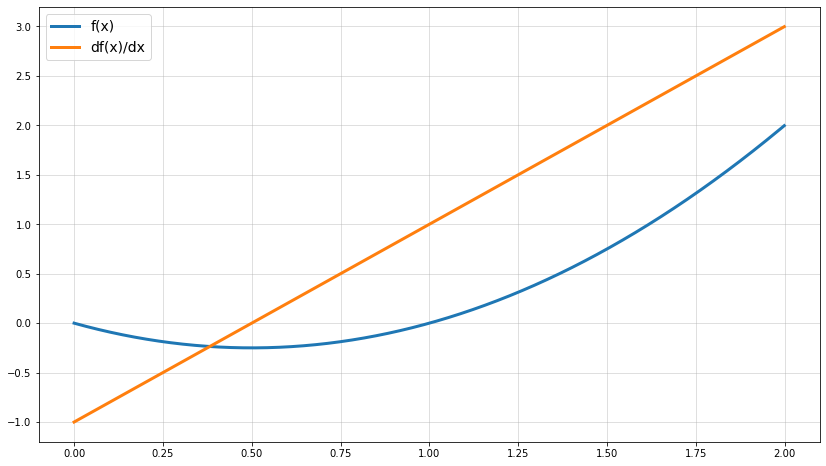

All right then the expected value for df(x=1)/dx is 1


In [105]:
# LET'S INSPECT THE FUNCTION AND ITS DERIVATIVE FIRST 

import sympy
import matplotlib.pyplot as plt
import numpy as np

# Symbolic computation just for fun
x = sympy.Symbol("x")
func = x*(x-1)
deriv = sympy.diff(func, x)
deriv = sympy.lambdify(x, deriv)
func = sympy.lambdify(x, func)

# define the x grid around x=1
xgrid = np.arange(0, 2, 0.001)

fig, ax = plt.subplots(figsize=(14,8))

ax.grid(alpha=0.5)
ax.plot(xgrid, func(xgrid), linewidth=3, label="f(x)")
ax.plot(xgrid, deriv(xgrid), linewidth=3, label="df(x)/dx")

ax.legend(fontsize=14)

plt.show()

print("All right then the expected value for df(x=1)/dx is 1")


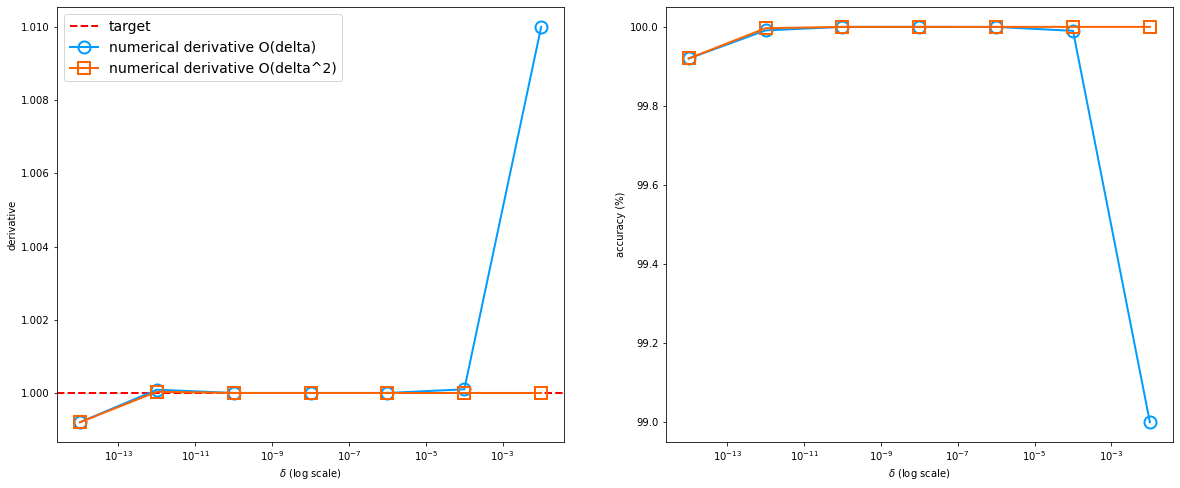

On the left we see the plot of the value of df(x=1)/dx versus the selected delta, while on the right we see the plot of the accuracy of df(x=1)/dx versus the selected delta.
Of course using the Newton's difference quotient (i.e. the definition of derivative) we get awful results for a big value of delta, such as 0.01.
This happens because the derivative definition is a limit, so delta should be as close to zero as possible in order to get accurate results.

By lowering the value of delta, we get more accurate results until BOTH methods starts failing... I guess rounding errors are somehow involved here...

Note that, since the function is quite simple, the two methods are perform basically the same (for reasonable values of delta, of course).


In [117]:
# NOW LET'S FULLFILL THE REQUESTS

import matplotlib.pyplot as plt

# define the function
def f(x):
    """this function is the function"""
    return x*(x-1)

# define the derivative
def d(f, x0, delta):
    """derivative definition"""
    return (f(x0+delta) - f(x0)) / delta

# define a better derivative
def accurate_d(f, x0, delta):
    """better numerical derivative"""
    return (f(x0+delta) - f(x0-delta)) / (2*delta)

# create the list of deltas
deltas = [10**-x for x in range(2, 15, 2)]
# compute the derivative using deltas
derivatives = [d(f, 1, delta) for delta in deltas]
# compute the accuracy of the computation
accuracies = [(1-abs(1-x))*100 for x in derivatives]
# compute the better derivative
accurate_derivatives = [accurate_d(f, 1, delta) for delta in deltas]
# compute the accuracy of the computation
accurate_accuracies = [(1-abs(1-x))*100 for x in accurate_derivatives]

# create figure and axes
fig, ax = plt.subplots(ncols=2, figsize=(20,8))

# in the first one we plot the derivatives
ax[0].axhline(y=1, linewidth=2, color='r', linestyle='dashed', label='target')
ax[0].plot(deltas, derivatives, linewidth=2, markersize=12, marker='o', fillstyle='none', color="#009CFF", markeredgewidth=2, label='numerical derivative O(delta)')
ax[0].plot(deltas, accurate_derivatives, linewidth=2, markersize=12, marker='s', fillstyle='none', color="#ff6300", markeredgewidth=2, label='numerical derivative O(delta^2)')

# ignore this
ax[0].set_xlabel("$\delta$ (log scale)")
ax[0].set_ylabel("derivative")
ax[0].set_xscale('log', base=10)
ax[0].legend(fontsize=14)

# in the second one we plot the accuraciies
ax[1].plot(deltas, accuracies, linewidth=2, markersize=12, marker='o', fillstyle='none', color="#009CFF", markeredgewidth=2)
ax[1].plot(deltas, accurate_accuracies, linewidth=2, markersize=12, marker='s', fillstyle='none', color="#ff6300", markeredgewidth=2)

# ignore this
ax[1].set_xlabel("$\delta$ (log scale)")
ax[1].set_ylabel("accuracy (%)")
ax[1].set_xscale('log', base=10)

plt.show()

# wall of text
print("On the left we see the plot of the value of df(x=1)/dx versus the selected delta, while on the right we see the plot of the accuracy of df(x=1)/dx versus the selected delta.")
print("Of course using the Newton's difference quotient (i.e. the definition of derivative) we get awful results for a big value of delta, such as 0.01.")
print("This happens because the derivative definition is a limit, so delta should be as close to zero as possible in order to get accurate results.")
print()
print("By lowering the value of delta, we get more accurate results until BOTH methods starts failing... I guess rounding errors are somehow involved here...")
print()
print("Note that, since the function is quite simple, the two methods are perform basically the same (for reasonable values of delta, of course).")

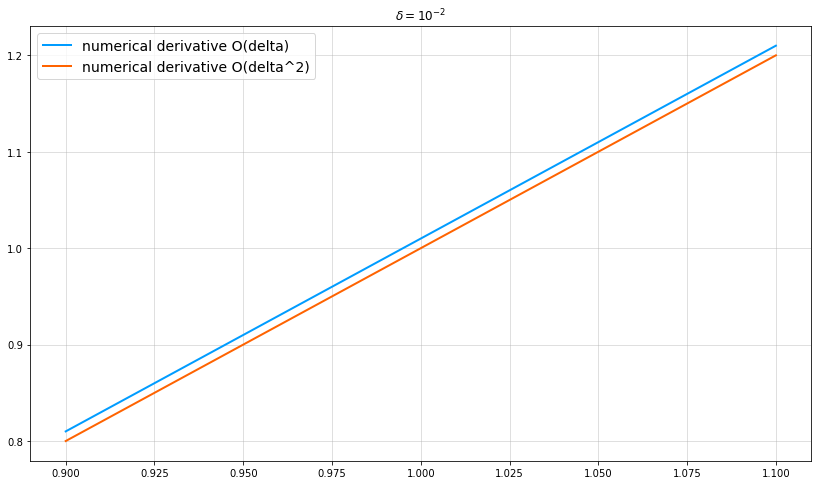

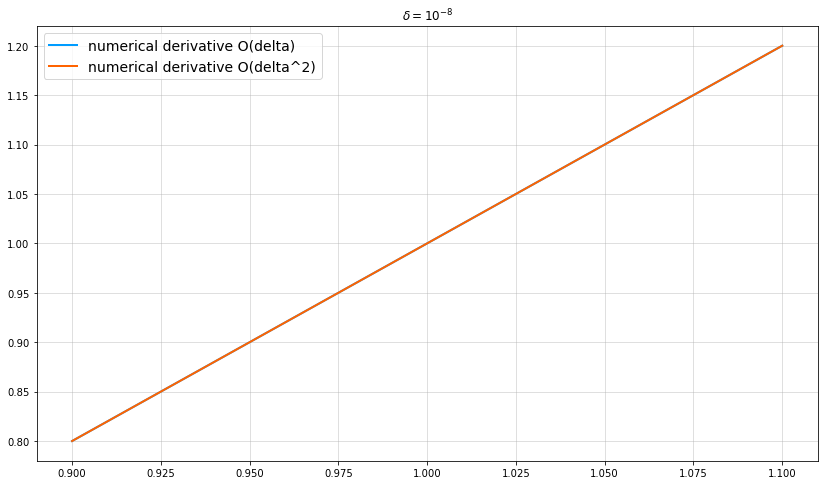

MemoryError: Unable to allocate 146. TiB for an array with shape (20000000000001,) and data type float64

In [126]:
# LET'S TRY PLOTTING THE DERIVATIVE USING THE TWO METHODS EVALUATED ON A GRID INSTED OF ON A SINGLE POINT!
import numpy as np

# using the biggest value of delta we get discrepant results between the two methods
delta = 0.01
xgrid = np.arange(0.9, 1.1, delta)

fig, ax = plt.subplots(figsize=(14,8))
ax.grid(alpha=0.5)

ax.plot(xgrid, d(f, xgrid, delta), linewidth=2, color="#009CFF", label='numerical derivative O(delta)')
ax.plot(xgrid, accurate_d(f, xgrid, delta), linewidth=2, color="#ff6300", label='numerical derivative O(delta^2)')

ax.legend(fontsize=14)

ax.set_title(r"$\delta=10^{-2}$")

plt.show()

# using a reasonable value of delta both methods perform the same
delta = 10**-8
xgrid = np.arange(0.9, 1.1, delta)

fig, ax = plt.subplots(figsize=(14,8))
ax.grid(alpha=0.5)

ax.plot(xgrid, d(f, xgrid, delta), linewidth=2, color="#009CFF", label='numerical derivative O(delta)')
ax.plot(xgrid, accurate_d(f, xgrid, delta), linewidth=2, color="#ff6300", label='numerical derivative O(delta^2)')

ax.legend(fontsize=14)

ax.set_title(r"$\delta=10^{-8}$")

plt.show()

# using a too small value of delta we get awful results anyway
delta = 10**-14
xgrid = np.arange(0.9, 1.1, delta)

fig, ax = plt.subplots(figsize=(14,8))
ax.grid(alpha=0.5)

ax.plot(xgrid, d(f, xgrid, delta), linewidth=2, color="#009CFF", label='numerical derivative O(delta)')
ax.plot(xgrid, accurate_d(f, xgrid, delta), linewidth=2, color="#ff6300", label='numerical derivative O(delta^2)')
ax.plot(xgrid, deriv(xgrid), linewidth=2, linestyle='dashed', color="#45BF55", label="analytical derivative")

ax.legend(fontsize=14)

ax.set_title(r"$\delta=10^{-14}$")

plt.show()

In [127]:
print("I wanted to show the plot with delta=10^-14 but python said NOPE. I guess I'll move on to the last exercise then...")

I wanted to show the plot with delta=10^-14 but python said NOPE. I guess I'll move on to the last exercise then...


7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [2]:
import math as m
import time 

# lets define the integrating funtion using the rectangles method (which is O(1/N) where N is the number of points in the grid)
def integral(f, N):
    """numerical integration"""
    h = 2/N
    x = -1
    return sum(h * f(x + i*h) for i in range(int(N)))

# define the semicircle function
def f(x):
    """semicircle with r=1 equation"""
    return m.sqrt(1 - pow(x, 2))

# set the true, expected result
TRUE_VALUE = m.pi/2

# set the value of N
N = 100

# start the time counting
start_time = time.process_time()
# perform the integration
I_100 = integral(f, N)
# compute the integration time
computation_time = time.process_time() - start_time

print()
print(f"Integral (N=100) = {I_100}")
print(f"True value = {TRUE_VALUE}")
print(f"Relative error = {100*(1-(I_100/TRUE_VALUE)):.2f}%")
print(f"Integration time = {computation_time:.10f}")
print()
print("Of course using such a small number of grid points does not lead to accurate results!")


Integral (N=100) = 1.5691342555492505
True value = 1.5707963267948966
Relative error = 0.11%
Integration time = 0.0000000000

Of course using such a small number of grid points does not lead to accurate results!


In [5]:
# let's fix the integration time to 1 second
# what is the maximum value of N we can set?

# starting value of N
N = 1e+06
t = 0
N_max = 0

while (t<1):
    N_max = N
    # start the time counting
    t0 = time.process_time()
    # perform the integration
    I_N = integral(f, N)
    # compute the integration time
    t = time.process_time() - t0
    N += 10000


print()
print(f"If we want the integration time to be at max 1 second we can fix N = {N_max}")


If we want the integration time to be at max 1 second we can fix N = 1510000.0


In [19]:
# LETS DO A QUICK CHECK
N = 1510000

# start the time counting
start_time = time.process_time()
# perform the integration
I_1sec = integral(f, N)
# compute the integration time
computation_time = time.process_time() - start_time

print()
print(f"Integral (N={N}) = {I_1sec}")
print(f"True value = {TRUE_VALUE}")
print(f"Relative error = {100*(1-(I_1sec/TRUE_VALUE))}%")
print(f"Integration time = {computation_time:.10f}")
print()


Integral (N=1510000) = 1.570796325898523
True value = 1.5707963267948966
Relative error = 5.706491945645098e-08%
Integration time = 0.9531250000



In [21]:
# finally lets see how big of an improvement in accuracy we get if we allow the integration to run for 1 minute
# the integration method we used is linear in time, we can simply set

N = 1510000 * 60

# and be fairly sure that the integration will run for approximately 1 minute

# start the time counting
start_time = time.process_time()
# perform the integration
I_1min = integral(f, N)
# compute the integration time
computation_time = time.process_time() - start_time

print()
print(f"Integral (N={N}) = {I_1min}")
print(f"True value = {TRUE_VALUE}")
print(f"Relative error (N=100) = {100*(1-(I_100/TRUE_VALUE))}%")
print(f"Relative error (N={N}) = {100*(1-(I_1min/TRUE_VALUE))}%")
print(f"Integration time = {computation_time:.10f}")


Integral (N=90600000) = 1.5707963267927996
True value = 1.5707963267948966
Relative error (N=100) = 0.10581074180618932%
Relative error (N=90600000) = 1.3349321648092882e-10%
Integration time = 55.5625000000
